In [1]:
import numpy as np
import tools21cm as t2c
from astropy.io import fits
import matplotlib.pyplot as plt

In [120]:
in_path_fg = "fits_files/"
in_path_cs = "Boxes/"

output_path = "Results/"
fname_all = "test_filename"

fname_foreground = "fg_all"
fname_cs = "test"


fname_foreground = "fg_all"
fname_cs = "test"

indata_fg = fits.getdata(in_path_fg+fname_foreground+'.fits').T
indata_cs = fits.getdata(in_path_cs+fname_cs+'.fits')/1000
noise = fits.getdata('fits_files/Noise_10000.fits').T
exgal = fits.getdata(in_path_fg + 'egfg_test.fits').T
syn =  fits.getdata(in_path_fg + 'ff_test.fits').T
free_free =  fits.getdata(in_path_fg + 'syn_test.fits').T

no_sl = 342

In [147]:
def power_2(data,m):
    box_dims = 128
    p, k_los , k_perp = t2c.power_spectrum_2d(data[27*m:27*(m+1)], kbins = 10, box_dims = box_dims)
    #log and mean zeroed
    pa = np.log(p)
    ps =pa
    #ps = pa - np.mean(pa)
    plt.pcolormesh(kperp,klos,ps , cmap = 'jet') 
    plt.xlabel('$k_{perp}$ (Mpc$^{-1}$)')
    plt.ylabel('$k_ {los}$ (Mpc$^{-1}$)')
    plt.xscale('log')
    plt.yscale('log')
    cbar = plt.colorbar(label = '$log(P(k))$')
    plt.clim(-18,18) #fix the colour bar values
    

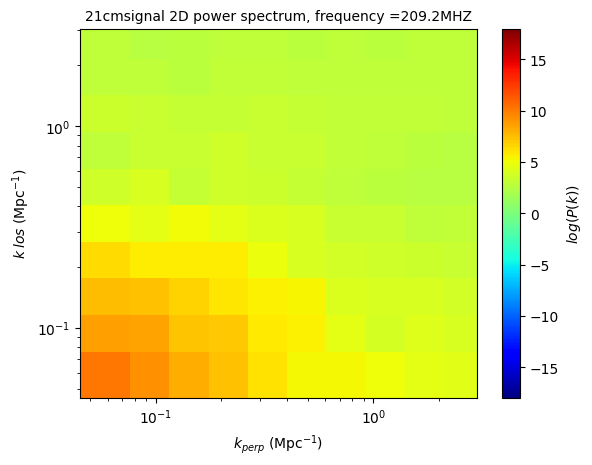

In [156]:
# signal, foreground and noise
data =  indata_fg
n = 12 # coeval cube for lightcone of signal
power_2(data,n)
name = '21cmsignal' # name of the signal
plt.title( name +' 2D power spectrum, frequency =' +str(round(4.05 + 108 +(8.1*n),1)) + 'MHZ', fontsize=10)
plt.savefig('images/'+ name + ' 2D power spectrum, frequency =' +str(round(4.05 + 108 +(8.1*n),1)) + 'MHZ.png')
